In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (2).png
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (34)-rotated2-rotated1.png
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (33)-rotated2-rotated2.png
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (27)-rotated1-rotated1.png
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (3)-rotated2-sharpened.png
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (12)-sharpened.jpg
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val/benign/benign (31)-sharpened.jpg
/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/

2025-07-22 03:29:03.472504: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753154943.723752      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753154943.799216      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Setting up TPU...
TPU not found, falling back to GPU/CPU
Using GPU with 1 replicas
Global batch size: 32
Per replica batch size: 32


I0000 00:00:1753154957.299833      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 8116 images belonging to 2 classes.
Found 900 images belonging to 2 classes.
Classes: ['benign', 'malignant']
Training samples: 8116
Validation samples: 900
Class weights: {0: 0.9960726558664703, 1: 1.003958436417615}
Building TPU-optimized ensemble model...
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Model built with 93,982,033 total parameters
Model summary:


Model: "tpu_ensemble_breast_cancer_classifier"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ main_input          │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast (Cast)         │ (None, 224, 224,  │          0 │ main_input[0][0]  │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ contrast_adjustment │ (None, 224, 224,  │          0 │ cast[0][0]        │
│ (ContrastAdjustmen… │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb3      │ (None, 7, 7,      │ 10,783,535 │ contrast_adjustm… │
│ (Functional)        │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_v3        │ (None, 5, 5,      │ 21,802,784 │ contrast_adjustm… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet152v2         │ (None, 7, 7,      │ 58,331,648 │ contrast_adjustm… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gap_eff             │ (None, 1536)      │          0 │ efficientnetb3[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gap_inc             │ (None, 2048)      │          0 │ inception_v3[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gap_res             │ (None, 2048)      │          0 │ resnet152v2[0][0] │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn1                 │ (None, 1536)      │      6,144 │ gap_eff[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2                 │ (None, 2048)      │      8,192 │ gap_inc[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn3                 │ (None, 2048)      │      8,192 │ gap_res[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1 (Dropout)  │ (None, 1536)      │          0 │ bn1[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2 (Dropout)  │ (None, 2048)      │          0 │ bn2[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout3 (Dropout)  │ (None, 2048)      │          0 │ bn3[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feature_concat      │ (None, 5632)      │          0 │ dropout1[0][0],   │
│ (Concatenate)       │                   │            │ dropout2[0][0],   │
│                     │                   │            │ dropout3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ final_bn            │ (None, 5632)      │     22,528 │ feature_concat[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 93,982,033 (358.51 MB)

 Trainable params: 3,040,002 (11.60 MB)

 Non-trainable params: 90,942,031 (346.92 MB)


PHASE 1: Training with frozen pre-trained models on TPU


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12


E0000 00:00:1753155022.498925      19 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/tpu_ensemble_breast_cancer_classifier_1/efficientnetb3_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1753155027.188947      59 cuda_dnn.cc:529] Loaded cuDNN version 90300


253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.7278 - loss: 0.6508 - precision: 0.7278 - recall: 0.7278
Epoch 1: val_accuracy improved from -inf to 0.88839, saving model to best_tpu_model.h5
253/253 ━━━━━━━━━━━━━━━━━━━━ 234s 765ms/step - accuracy: 0.7280 - loss: 0.6502 - precision: 0.7280 - recall: 0.7280 - val_accuracy: 0.8884 - val_loss: 0.2748 - val_precision: 0.8884 - val_recall: 0.8884 - learning_rate: 0.0010
Epoch 2/12
  1/253 ━━━━━━━━━━━━━━━━━━━━ 1:12 288ms/step - accuracy: 0.7500 - loss: 0.4431 - precision: 0.7500 - recall: 0.7500

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.88839 to 0.89062, saving model to best_tpu_model.h5
253/253 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.7500 - loss: 0.4431 - precision: 0.7500 - recall: 0.7500 - val_accuracy: 0.8906 - val_loss: 0.2747 - val_precision: 0.8906 - val_recall: 0.8906 - learning_rate: 0.0010
Epoch 3/12
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.8360 - loss: 0.3635 - precision: 0.8360 - recall: 0.8360
Epoch 3: val_accuracy improved from 0.89062 to 0.89397, saving model to best_tpu_model.h5
253/253 ━━━━━━━━━━━━━━━━━━━━ 126s 497ms/step - accuracy: 0.8360 - loss: 0.3635 - precision: 0.8360 - recall: 0.8360 - val_accuracy: 0.8940 - val_loss: 0.2752 - val_precision: 0.8940 - val_recall: 0.8940 - learning_rate: 0.0010
Epoch 4/12
  1/253 ━━━━━━━━━━━━━━━━━━━━ 1:14 297ms/step - accuracy: 0.9062 - loss: 0.2404 - precision: 0.9062 - recall: 0.9062
Epoch 4: val_accuracy did not improve from 0.89397
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9062 - l

E0000 00:00:1753155965.364143      19 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/tpu_ensemble_breast_cancer_classifier_1/efficientnetb3_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.8516 - loss: 0.3528 - precision: 0.8516 - recall: 0.8516
Epoch 1: val_accuracy improved from -inf to 0.92411, saving model to best_fine_tuned_tpu_model.h5
253/253 ━━━━━━━━━━━━━━━━━━━━ 217s 645ms/step - accuracy: 0.8517 - loss: 0.3526 - precision: 0.8517 - recall: 0.8517 - val_accuracy: 0.9241 - val_loss: 0.1827 - val_precision: 0.9241 - val_recall: 0.9241 - learning_rate: 1.0000e-05
Epoch 2/18
  1/253 ━━━━━━━━━━━━━━━━━━━━ 1:42 405ms/step - accuracy: 0.8438 - loss: 0.3380 - precision: 0.8438 - recall: 0.8438
Epoch 2: val_accuracy did not improve from 0.92411
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8438 - loss: 0.3380 - precision: 0.8438 - recall: 0.8438 - val_accuracy: 0.9241 - val_loss: 0.1829 - val_precision: 0.9241 - val_recall: 0.9241 - learning_rate: 1.0000e-05
Epoch 3/18
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.8818 - loss: 0.2679 - precision: 0.8818 - recall: 0.8818
Epoch 3: val_accuracy impr

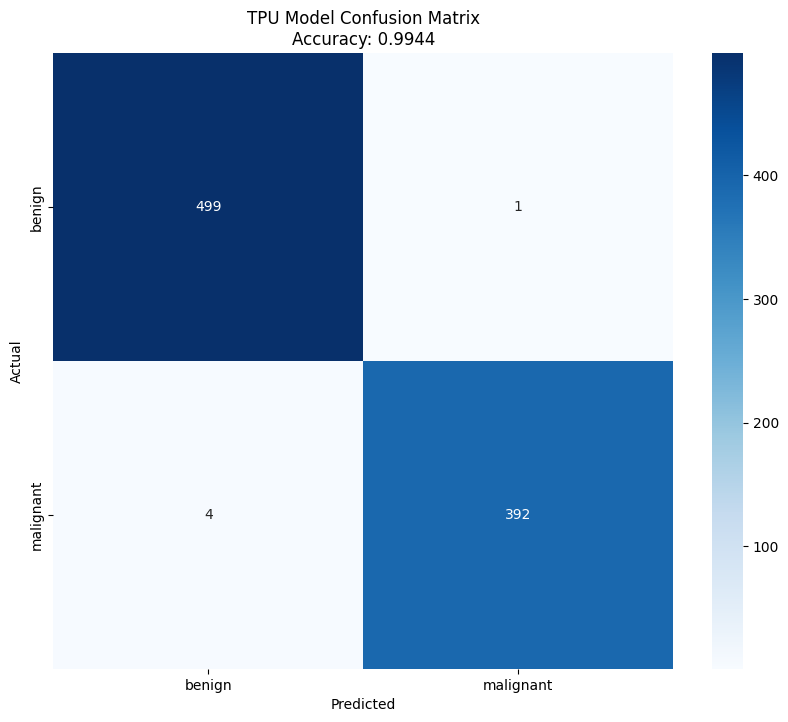


APPLYING TPU-OPTIMIZED TEST-TIME AUGMENTATION
Applying TPU-optimized TTA with 4 augmentations...
TTA Augmentation 2/4
Found 900 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


TTA Augmentation 3/4
Found 900 images belonging to 2 classes.
TTA Augmentation 4/4
Found 900 images belonging to 2 classes.

TTA Results:
Accuracy: 0.9989 (99.89%)
Precision: 0.9989
Recall: 0.9989
F1-Score: 0.9989
Improvement over single model: +0.45%

TTA Classification Report:
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00       500
   malignant       1.00      1.00      1.00       396

    accuracy                           1.00       896
   macro avg       1.00      1.00      1.00       896
weighted avg       1.00      1.00      1.00       896



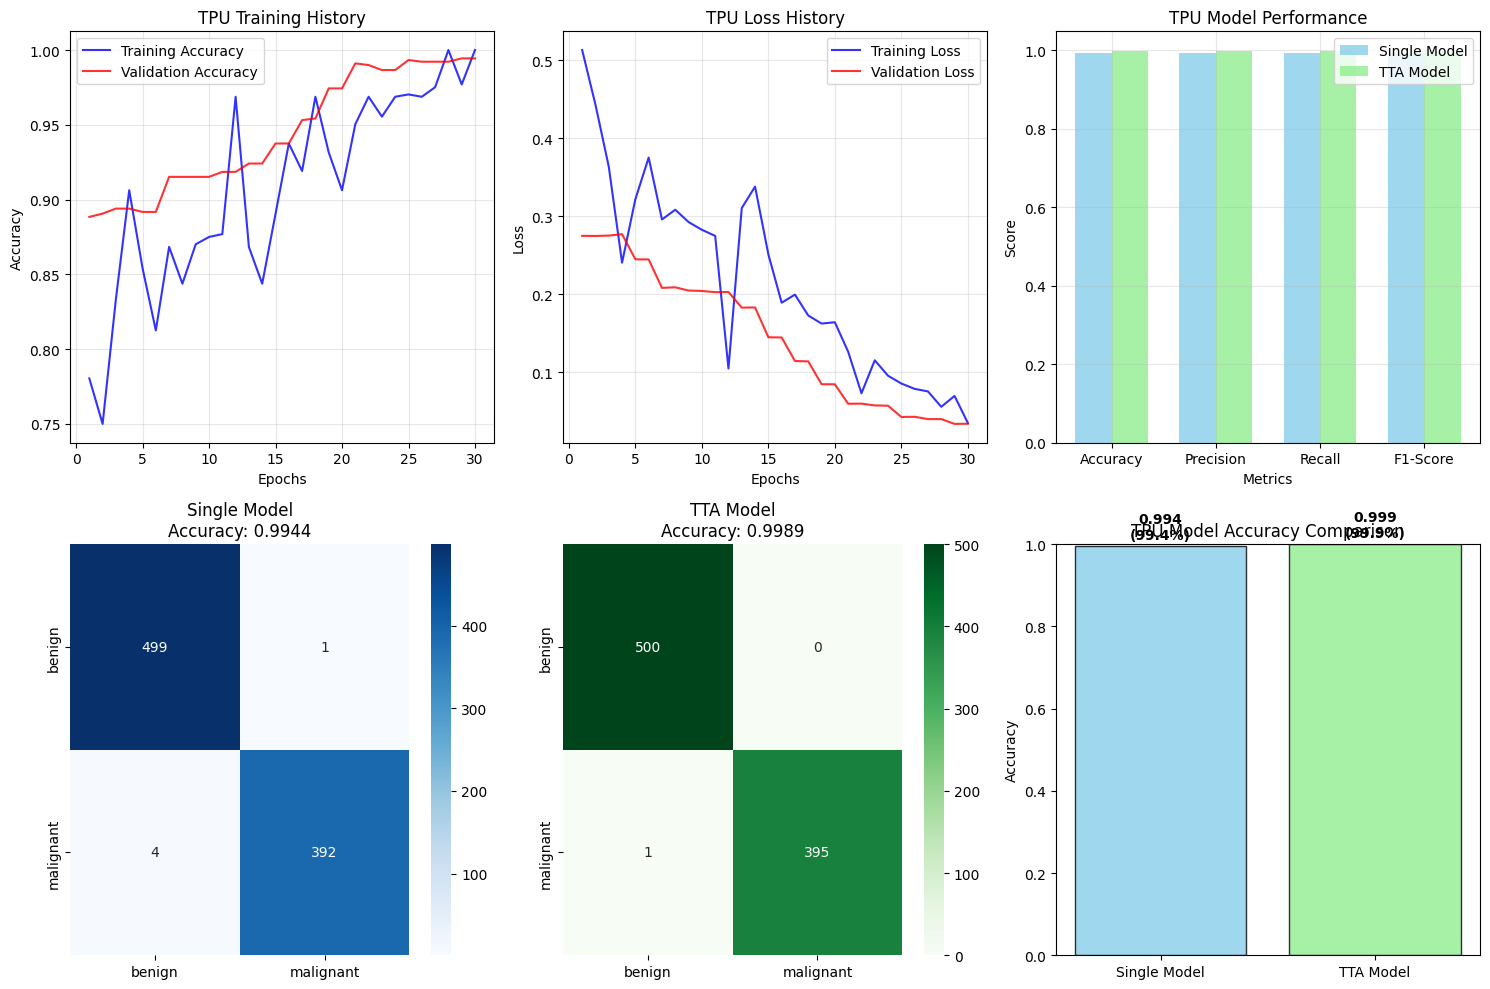


TPU MODEL TRAINING COMPLETE
Strategy used: <tensorflow.python.distribute.mirrored_strategy.MirroredStrategy object at 0x7ba1ee34bad0>
Number of replicas: 1
Global batch size: 32
Best Model Saved as: best_fine_tuned_tpu_model.h5
Final Single Model Accuracy: 0.9944 (99.44%)
Final TTA Accuracy: 0.9989 (99.89%)
Total Improvement with TTA: +0.45%


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Dense, Dropout, GlobalAveragePooling2D, 
                                   Concatenate, BatchNormalization, Add, Layer)
from tensorflow.keras.applications import (InceptionV3, EfficientNetB3, ResNet152V2, 
                                         DenseNet169)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau, 
                                      ModelCheckpoint, LearningRateScheduler)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
import cv2
from tensorflow.keras import mixed_precision
import json

# TPU Configuration - CRITICAL FOR TPU USAGE
print("Setting up TPU...")
try:
    # Detect TPU
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print(f'Running on TPU: {tpu.cluster_spec().as_dict()}')
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_system(tpu)
    
    # Create TPU strategy
    strategy = tf.distribute.TPUStrategy(tpu)
    print(f"Number of replicas: {strategy.num_replicas_in_sync}")
    
    # Enable mixed precision for TPU
    mixed_precision.set_global_policy('mixed_bfloat16')  # Use bfloat16 for TPU
    
except ValueError:
    print("TPU not found, falling back to GPU/CPU")
    # Try GPU
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            strategy = tf.distribute.MirroredStrategy()
            print(f"Using GPU with {strategy.num_replicas_in_sync} replicas")
            mixed_precision.set_global_policy('mixed_float16')
        except RuntimeError as e:
            print(f"GPU setup failed: {e}")
            strategy = tf.distribute.get_strategy()  # Default strategy
    else:
        strategy = tf.distribute.get_strategy()  # Default strategy
        print("Using default strategy (CPU)")

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# TPU-optimized configuration
GLOBAL_BATCH_SIZE = 32 * strategy.num_replicas_in_sync  # Scale batch size for TPU
IMG_SIZE = 224  # Standard size for pre-trained models, TPU-friendly
EPOCHS = 30
PATIENCE = 8

print(f"Global batch size: {GLOBAL_BATCH_SIZE}")
print(f"Per replica batch size: {GLOBAL_BATCH_SIZE // strategy.num_replicas_in_sync}")

# Define data paths - Update these according to your dataset location
train_dir = "/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/train"
val_dir = "/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val"

# TPU-compatible preprocessing layer
class ContrastAdjustmentLayer(Layer):
    def __init__(self, contrast_factor=1.2, **kwargs):
        super(ContrastAdjustmentLayer, self).__init__(**kwargs)
        self.contrast_factor = contrast_factor
    
    def call(self, inputs):
        return tf.image.adjust_contrast(inputs, self.contrast_factor)
    
    def get_config(self):
        config = super().get_config()
        config.update({"contrast_factor": self.contrast_factor})
        return config

# Enhanced data augmentation optimized for TPU
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=12,
    width_shift_range=0.08,
    height_shift_range=0.08,
    shear_range=0.08,
    zoom_range=0.12,
    horizontal_flip=True,
    brightness_range=[0.85, 1.15],
    fill_mode='reflect'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Data generators with TPU-optimized batch size
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=GLOBAL_BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    interpolation='bilinear'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=GLOBAL_BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    interpolation='bilinear'
)

print(f"Classes: {list(train_generator.class_indices.keys())}")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")

# Calculate class weights
y_integers = train_generator.classes
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_integers),
    y=y_integers
)
class_weight_dict = dict(enumerate(class_weights))
print(f"Class weights: {class_weight_dict}")

# TPU-optimized ensemble model
def create_tpu_optimized_ensemble_model(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=2):
    """Create TPU-optimized ensemble model"""
    
    # Single input layer to avoid TPU complications
    input_layer = Input(shape=input_shape, name='main_input')
    
    # Apply contrast adjustment
    contrast_adjusted = ContrastAdjustmentLayer(contrast_factor=1.15, name='contrast_adjustment')(input_layer)
    
    # Create base models with proper TPU configuration
    # EfficientNetB3 - excellent for medical images
    base1 = EfficientNetB3(
        include_top=False, 
        weights='imagenet', 
        input_shape=input_shape,
        pooling=None
    )
    base1._name = 'efficientnet_base'
    
    # InceptionV3 - multi-scale features
    base2 = InceptionV3(
        include_top=False, 
        weights='imagenet', 
        input_shape=input_shape,
        pooling=None
    )
    base2._name = 'inception_base'
    
    # ResNet152V2 - deep residual learning
    base3 = ResNet152V2(
        include_top=False, 
        weights='imagenet', 
        input_shape=input_shape,
        pooling=None
    )
    base3._name = 'resnet_base'
    
    # Initially freeze all base models
    base_models = [base1, base2, base3]
    for base in base_models:
        base.trainable = False
    
    # Extract features from each model
    features1 = base1(contrast_adjusted)
    features2 = base2(contrast_adjusted)
    features3 = base3(contrast_adjusted)
    
    # Global Average Pooling for each branch
    gap1 = GlobalAveragePooling2D(name='gap_eff')(features1)
    gap2 = GlobalAveragePooling2D(name='gap_inc')(features2)
    gap3 = GlobalAveragePooling2D(name='gap_res')(features3)
    
    # Individual feature processing with BatchNorm for TPU stability
    x1 = BatchNormalization(name='bn1')(gap1)
    x1 = Dropout(0.3, name='dropout1')(x1)
    
    x2 = BatchNormalization(name='bn2')(gap2)
    x2 = Dropout(0.3, name='dropout2')(x2)
    
    x3 = BatchNormalization(name='bn3')(gap3)
    x3 = Dropout(0.3, name='dropout3')(x3)
    
    # Concatenate all features
    concatenated = Concatenate(name='feature_concat')([x1, x2, x3])
    
    # Final classification layers optimized for TPU
    x = BatchNormalization(name='final_bn')(concatenated)
    x = Dropout(0.5, name='final_dropout1')(x)
    x = Dense(512, activation='relu', name='dense1')(x)
    x = BatchNormalization(name='dense1_bn')(x)
    x = Dropout(0.4, name='final_dropout2')(x)
    x = Dense(256, activation='relu', name='dense2')(x)
    x = BatchNormalization(name='dense2_bn')(x)
    x = Dropout(0.3, name='final_dropout3')(x)
    
    # Output layer with float32 for numerical stability
    output = Dense(num_classes, activation='softmax', dtype='float32', name='final_output')(x)
    
    model = Model(inputs=input_layer, outputs=output, name='tpu_ensemble_breast_cancer_classifier')
    
    return model, base_models

# Build model within TPU strategy scope
print("Building TPU-optimized ensemble model...")
with strategy.scope():
    model, base_models = create_tpu_optimized_ensemble_model(num_classes=train_generator.num_classes)
    
    # Compile model with TPU-optimized settings
    initial_lr = 0.001 * strategy.num_replicas_in_sync  # Scale learning rate for TPU
    
    model.compile(
        optimizer=Adam(learning_rate=initial_lr, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
        loss='categorical_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )

print(f"Model built with {model.count_params():,} total parameters")
print("Model summary:")
model.summary()

# TPU-optimized callbacks
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=PATIENCE,
        restore_best_weights=True,
        verbose=1,
        min_delta=0.001
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.3,
        patience=5,
        verbose=1,
        min_lr=1e-8,
        min_delta=0.0001
    ),
    ModelCheckpoint(
        "best_tpu_model.h5",
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1,
        save_weights_only=False
    )
]

# Phase 1: Train with frozen base models
print("\n" + "="*60)
print("PHASE 1: Training with frozen pre-trained models on TPU")
print("="*60)

try:
    history_phase1 = model.fit(
        train_generator,
        epochs=12,
        validation_data=val_generator,
        callbacks=callbacks,
        class_weight=class_weight_dict,
        verbose=1,
        steps_per_epoch=train_generator.samples // GLOBAL_BATCH_SIZE,
        validation_steps=val_generator.samples // GLOBAL_BATCH_SIZE
    )
    
    print("Phase 1 completed successfully!")
    
except Exception as e:
    print(f"Error in Phase 1: {e}")
    print("Trying with smaller batch size...")
    
    # Recreate generators with smaller batch size
    GLOBAL_BATCH_SIZE = 16 * strategy.num_replicas_in_sync
    
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=GLOBAL_BATCH_SIZE,
        class_mode='categorical',
        shuffle=True,
        interpolation='bilinear'
    )
    
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=GLOBAL_BATCH_SIZE,
        class_mode='categorical',
        shuffle=False,
        interpolation='bilinear'
    )
    
    history_phase1 = model.fit(
        train_generator,
        epochs=12,
        validation_data=val_generator,
        callbacks=callbacks,
        class_weight=class_weight_dict,
        verbose=1,
        steps_per_epoch=train_generator.samples // GLOBAL_BATCH_SIZE,
        validation_steps=val_generator.samples // GLOBAL_BATCH_SIZE
    )

# Phase 2: Progressive unfreezing and fine-tuning
print("\n" + "="*60)
print("PHASE 2: Progressive fine-tuning on TPU")
print("="*60)

def progressive_unfreeze_tpu(base_models, unfreeze_percent=0.2):
    """TPU-optimized progressive unfreezing"""
    with strategy.scope():
        for i, base_model in enumerate(base_models):
            total_layers = len(base_model.layers)
            unfreeze_from = int(total_layers * (1 - unfreeze_percent))
            
            for layer in base_model.layers[unfreeze_from:]:
                layer.trainable = True
            
            print(f"Base model {i+1}: Unfrozen {total_layers - unfreeze_from}/{total_layers} layers")

# Progressive unfreezing
progressive_unfreeze_tpu(base_models, unfreeze_percent=0.15)

# Recompile with lower learning rate for fine-tuning
with strategy.scope():
    model.compile(
        optimizer=Adam(learning_rate=1e-5 * strategy.num_replicas_in_sync, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
        loss='categorical_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )

# Fine-tuning callbacks
fine_tune_callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=6,
        restore_best_weights=True,
        verbose=1,
        min_delta=0.0005
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=4,
        verbose=1,
        min_lr=1e-9
    ),
    ModelCheckpoint(
        "best_fine_tuned_tpu_model.h5",
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
]

history_phase2 = model.fit(
    train_generator,
    epochs=18,
    validation_data=val_generator,
    callbacks=fine_tune_callbacks,
    class_weight=class_weight_dict,
    verbose=1,
    steps_per_epoch=train_generator.samples // GLOBAL_BATCH_SIZE,
    validation_steps=val_generator.samples // GLOBAL_BATCH_SIZE
)

# Final evaluation
print("\n" + "="*60)
print("FINAL MODEL EVALUATION ON TPU")
print("="*60)

# Reset generator and predict
val_generator.reset()
print("Making predictions...")
final_predictions = model.predict(
    val_generator, 
    verbose=1,
    steps=val_generator.samples // GLOBAL_BATCH_SIZE
)
y_pred_final = np.argmax(final_predictions, axis=1)

# Get true labels (truncate to match predictions length)
y_true_final = val_generator.classes[:len(y_pred_final)]

# Get class names
class_names = list(val_generator.class_indices.keys())

# Detailed classification report
print("\nFinal Classification Report:")
print(classification_report(y_true_final, y_pred_final, target_names=class_names))

# Calculate metrics
final_accuracy = accuracy_score(y_true_final, y_pred_final)
final_precision = precision_score(y_true_final, y_pred_final, average='weighted')
final_recall = recall_score(y_true_final, y_pred_final, average='weighted')
final_f1 = f1_score(y_true_final, y_pred_final, average='weighted')

print(f"\nFinal Metrics:")
print(f"Accuracy: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1-Score: {final_f1:.4f}")

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true_final, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names)
plt.title(f'TPU Model Confusion Matrix\nAccuracy: {final_accuracy:.4f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# TPU-optimized Test-Time Augmentation
def tpu_test_time_augmentation(model, generator, n_augmentations=5):
    """TPU-optimized test-time augmentation"""
    print(f"Applying TPU-optimized TTA with {n_augmentations} augmentations...")
    
    all_predictions = []
    
    # Original predictions
    generator.reset()
    original_preds = model.predict(
        generator, 
        verbose=0,
        steps=generator.samples // GLOBAL_BATCH_SIZE
    )
    all_predictions.append(original_preds)
    
    # Create augmented predictions
    for aug_idx in range(1, n_augmentations):
        print(f"TTA Augmentation {aug_idx + 1}/{n_augmentations}")
        
        # Create new augmented generator
        aug_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=np.random.uniform(5, 15),
            width_shift_range=np.random.uniform(0.05, 0.1),
            height_shift_range=np.random.uniform(0.05, 0.1),
            zoom_range=np.random.uniform(0.05, 0.15),
            horizontal_flip=True,
            brightness_range=[0.9, 1.1],
            fill_mode='reflect'
        )
        
        aug_generator = aug_datagen.flow_from_directory(
            val_dir,
            target_size=(IMG_SIZE, IMG_SIZE),
            batch_size=GLOBAL_BATCH_SIZE,
            class_mode='categorical',
            shuffle=False,
            interpolation='bilinear'
        )
        
        aug_preds = model.predict(
            aug_generator, 
            verbose=0,
            steps=aug_generator.samples // GLOBAL_BATCH_SIZE
        )
        all_predictions.append(aug_preds)
    
    # Average all predictions
    tta_predictions = np.mean(all_predictions, axis=0)
    return tta_predictions

# Apply TTA
print("\n" + "="*60)
print("APPLYING TPU-OPTIMIZED TEST-TIME AUGMENTATION")
print("="*60)

tta_predictions = tpu_test_time_augmentation(model, val_generator, n_augmentations=4)
tta_y_pred = np.argmax(tta_predictions, axis=1)
tta_y_true = val_generator.classes[:len(tta_y_pred)]

# TTA Results
tta_accuracy = accuracy_score(tta_y_true, tta_y_pred)
tta_precision = precision_score(tta_y_true, tta_y_pred, average='weighted')
tta_recall = recall_score(tta_y_true, tta_y_pred, average='weighted')
tta_f1 = f1_score(tta_y_true, tta_y_pred, average='weighted')

print(f"\nTTA Results:")
print(f"Accuracy: {tta_accuracy:.4f} ({tta_accuracy*100:.2f}%)")
print(f"Precision: {tta_precision:.4f}")
print(f"Recall: {tta_recall:.4f}")
print(f"F1-Score: {tta_f1:.4f}")
print(f"Improvement over single model: {((tta_accuracy - final_accuracy) * 100):+.2f}%")

print("\nTTA Classification Report:")
print(classification_report(tta_y_true, tta_y_pred, target_names=class_names))

# Performance visualization
plt.figure(figsize=(15, 10))

# Training history
plt.subplot(2, 3, 1)
all_train_acc = []
all_val_acc = []

for hist in [history_phase1, history_phase2]:
    all_train_acc.extend(hist.history['accuracy'])
    all_val_acc.extend(hist.history['val_accuracy'])

epochs_range = range(1, len(all_train_acc) + 1)
plt.plot(epochs_range, all_train_acc, 'b-', label='Training Accuracy', alpha=0.8)
plt.plot(epochs_range, all_val_acc, 'r-', label='Validation Accuracy', alpha=0.8)
plt.title('TPU Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Loss history
plt.subplot(2, 3, 2)
all_train_loss = []
all_val_loss = []

for hist in [history_phase1, history_phase2]:
    all_train_loss.extend(hist.history['loss'])
    all_val_loss.extend(hist.history['val_loss'])

plt.plot(epochs_range, all_train_loss, 'b-', label='Training Loss', alpha=0.8)
plt.plot(epochs_range, all_val_loss, 'r-', label='Validation Loss', alpha=0.8)
plt.title('TPU Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Metrics comparison
plt.subplot(2, 3, 3)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
single_values = [final_accuracy, final_precision, final_recall, final_f1]
tta_values = [tta_accuracy, tta_precision, tta_recall, tta_f1]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, single_values, width, label='Single Model', alpha=0.8, color='skyblue')
plt.bar(x + width/2, tta_values, width, label='TTA Model', alpha=0.8, color='lightgreen')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('TPU Model Performance')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, alpha=0.3)

# Confusion matrices comparison
plt.subplot(2, 3, 4)
cm_single = confusion_matrix(y_true_final, y_pred_final)
sns.heatmap(cm_single, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names)
plt.title(f'Single Model\nAccuracy: {final_accuracy:.4f}')

plt.subplot(2, 3, 5)
cm_tta = confusion_matrix(tta_y_true, tta_y_pred)
sns.heatmap(cm_tta, annot=True, fmt='d', cmap='Greens', 
           xticklabels=class_names, yticklabels=class_names)
plt.title(f'TTA Model\nAccuracy: {tta_accuracy:.4f}')

# Performance improvement
plt.subplot(2, 3, 6)
models = ['Single Model', 'TTA Model']
accuracies = [final_accuracy, tta_accuracy]
colors = ['skyblue', 'lightgreen']

bars = plt.bar(models, accuracies, color=colors, alpha=0.8, edgecolor='black')
plt.title('TPU Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.3f}\n({acc*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("TPU MODEL TRAINING COMPLETE")
print("="*60)
print(f"Strategy used: {strategy}")
print(f"Number of replicas: {strategy.num_replicas_in_sync}")
print(f"Global batch size: {GLOBAL_BATCH_SIZE}")
print(f"Best Model Saved as: best_fine_tuned_tpu_model.h5")
print(f"Final Single Model Accuracy: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
print(f"Final TTA Accuracy: {tta_accuracy:.4f} ({tta_accuracy*100:.2f}%)")
print(f"Total Improvement with TTA: {((tta_accuracy - final_accuracy) * 100):+.2f}%")